In [1]:
from IPython.display import HTML

import pandas as pd
import numpy as np
from pandas.io.json import json_normalize 
import requests
import json

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
from matplotlib.pyplot import figure

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


# Modelos por estación
Criterio de selección de estaciones: cercanía a toma de CO, y mayor número de viajes

# Estación 364
km_to_CO 0.4474
<br>
total de viajes 2050

In [2]:
df_12 = pd.read_csv("df_station_200.csv")

In [3]:
df_12.head(1)

,hora,km_to_CO,start station id,cantidad_de_viajes,distancia_recorrida_sum,duracion_del_viaje,date_local,contaminante_co
0,15,0.4474,200,1,6.6611,1949,2019-01-02,0.33


In [4]:
df_12 = df_12.drop(columns = ["km_to_CO", "start station id", "date_local"])
df_12.head(1)

,hora,cantidad_de_viajes,distancia_recorrida_sum,duracion_del_viaje,contaminante_co
0,15,1,6.6611,1949,0.33


In [5]:
df_12.describe()

,hora,cantidad_de_viajes,distancia_recorrida_sum,duracion_del_viaje,contaminante_co
count,2013.000000,2013.000000,2013.000000,2.013000e+03,2013.000000
mean,13.218082,1.496771,3.498431,4.054824e+03,0.226423
std,4.458070,0.845180,3.145597,3.733417e+04,0.094085
min,0.000000,1.000000,0.000000,8.500000e+01,0.094000
25%,10.000000,1.000000,1.295500,5.230000e+02,0.172000
50%,13.000000,1.000000,2.716600,9.400000e+02,0.205000
75%,17.000000,2.000000,4.681600,1.716000e+03,0.255000
max,23.000000,7.000000,27.717900,1.139139e+06,1.609000


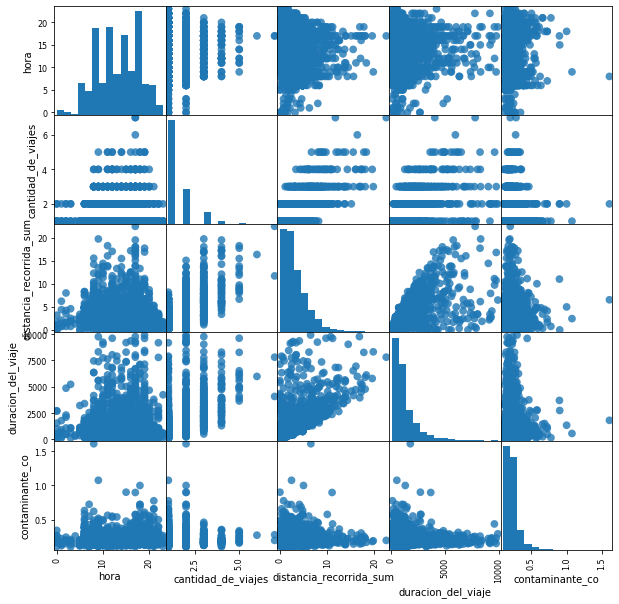

In [21]:
pd.plotting.scatter_matrix(df_12, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 15}, s = 60, alpha = 0.8)
plt.show()

In [20]:
#removing outliers
df_12 = df_12[df_12["duracion_del_viaje"] <= 10000]

**Data train/test**

In [22]:
train_12, test_12 = train_test_split(df_12, test_size=0.2, random_state=1)
test_12.sort_values(by = 'cantidad_de_viajes', ascending = True, inplace = True) #just for visualization purposes


/Users/wera/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
#OPTIONAL scale numerical features, not the label
#scaler = MinMaxScaler()
#df_12[df_12.columns] = scaler.fit_transform(df_12[df_12.columns])

#no hizo diferencia

**Regresión lineal**

In [23]:
#Linera regression
lr_12 = linear_model.LinearRegression()

#Train LR
lr_12.fit(train_12.drop("contaminante_co", axis=1), train_12["contaminante_co"])

#Predictions with LR
y_pred_lr_12 = lr_12.predict(test_12.drop("contaminante_co", axis=1))

In [24]:
#Mean Squared Error, Determination Coefficient and Coefficients from LR
mse_lr_12 = np.sqrt(mean_squared_error(test_12["contaminante_co"], y_pred_lr_12))
r2_lr_12 = r2_score(test_12["contaminante_co"], y_pred_lr_12)

print(f"Square root of the mean squared error: {round(mse_lr_12, 4)}")
print(f"Determination Coeficient: {round(r2_lr_12, 4)}")
print('Coefficients: \n', lr_12.coef_)

Square root of the mean squared error: 0.119
Determination Coeficient: 0.003
Coefficients: 
 [ 2.41337986e-03 -4.13936112e-03  1.04370502e-03 -4.00245639e-06]


In [25]:
test_sort_12 = test_12.sort_index(axis = 0) 

#predicción sort
y_pred_lr_sort_12 = lr_12.predict(test_sort_12.drop("contaminante_co", axis=1))

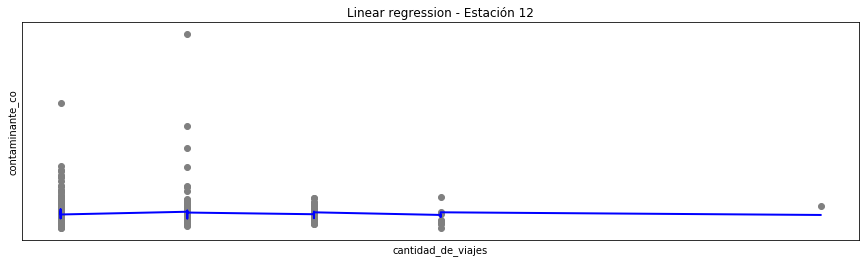

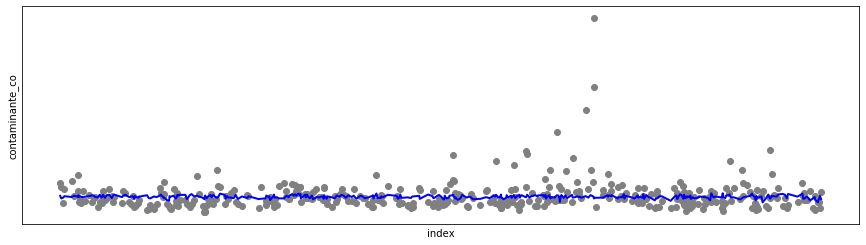

In [26]:
#Plot
figure(figsize=(15, 4))
plt.scatter(test_12['cantidad_de_viajes'], test_12["contaminante_co"],  color='grey')
plt.plot(test_12['cantidad_de_viajes'], y_pred_lr_12 , color='blue', linewidth=2)

plt.title("Linear regression - Estación 12")

plt.xticks(())
plt.yticks(())
plt.xlabel('cantidad_de_viajes')
plt.ylabel("contaminante_co")
plt.show()

#Plot - sort
figure(figsize=(15, 4))
plt.scatter(test_sort_12.index, test_sort_12["contaminante_co"],  color='grey')
plt.plot(test_sort_12.index, y_pred_lr_sort_12 , color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())
plt.xlabel('index')
plt.ylabel("contaminante_co")
plt.show()

**Decision tree**

In [27]:
#Decision tree
tree_12 = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators = 1, random_state = 0) #max_depth = 5, 

#Train
tree_12.fit(train_12.drop("contaminante_co", axis = 1), train_12["contaminante_co"])

#Predictions with DT
y_pred_tree_12 = tree_12.predict(test_12.drop("contaminante_co", axis=1))

In [28]:
#Mean Squared Error and Determination Coefficient
mse_tree_12 = np.sqrt(mean_squared_error(test_12["contaminante_co"], y_pred_tree_12))
r2_tree_12 = r2_score(test_12["contaminante_co"], y_pred_tree_12)

print(f"Square root of the mean squared error: {round(mse_tree_12, 4)}")
print(f"Determination Coeficient: {round(r2_tree_12, 4)}")

Square root of the mean squared error: 0.1498
Determination Coeficient: -0.5804


In [29]:
#test_sort_12 = test.sort_index(axis = 0) 

#predicción sort
y_pred_tree_sort_12 = tree_12.predict(test_12.drop("contaminante_co", axis = 1))

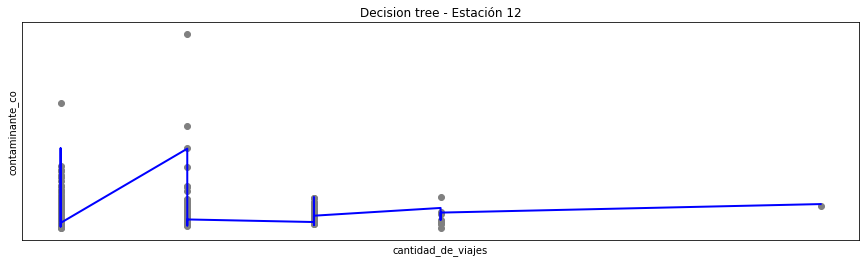

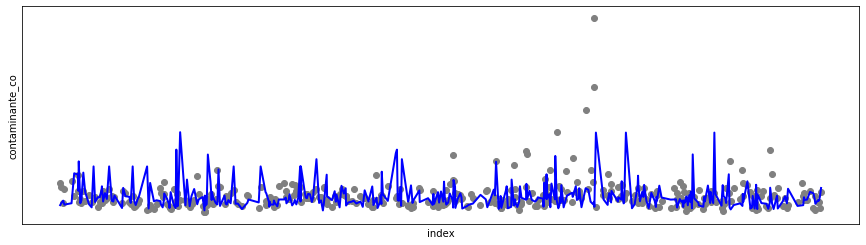

In [30]:
#Plot
figure(figsize=(15, 4))
plt.scatter(test_12['cantidad_de_viajes'], test_12["contaminante_co"],  color='grey')
plt.plot(test_12['cantidad_de_viajes'], y_pred_tree_12 , color='blue', linewidth=2)

plt.title("Decision tree - Estación 12")

plt.xticks(())
plt.yticks(())
plt.xlabel('cantidad_de_viajes')
plt.ylabel("contaminante_co")
plt.show()

#Plot - sort
figure(figsize=(15, 4))
plt.scatter(test_sort_12.index, test_sort_12["contaminante_co"],  color='grey')
plt.plot(test_sort_12.index, y_pred_tree_sort_12 , color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())
plt.xlabel('index')
plt.ylabel("contaminante_co")
plt.show()

**Neural network - MLP** Multi-layer Perceptron regressor

In [35]:
#Multi-layer Perceptron regressor
mlp_12 = MLPRegressor(random_state = 1, max_iter = 100) 

#Train
mlp_12.fit(train_12.drop("contaminante_co", axis = 1), train_12["contaminante_co"])

#Predictions with MLP
y_pred_mlp_12 = mlp_12.predict(test_12.drop("contaminante_co", axis=1))

/Users/wera/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [36]:
#Mean Squared Error and Determination Coefficient
mse_mlp_12 = np.sqrt(mean_squared_error(test_12["contaminante_co"], y_pred_mlp_12))
r2_mlp_12 = r2_score(test_12["contaminante_co"], y_pred_mlp_12)

print(f"Square root of the mean squared error: {round(mse_mlp_12, 4)}")
print(f"Determination Coeficient: {round(r2_mlp_12, 4)}")

Square root of the mean squared error: 0.1478
Determination Coeficient: -0.5378


In [37]:
#test_sort_12 = test.sort_index(axis = 0) 

#predicción sort
y_pred_mlp_sort_12 = mlp_12.predict(test_12.drop("contaminante_co", axis = 1))

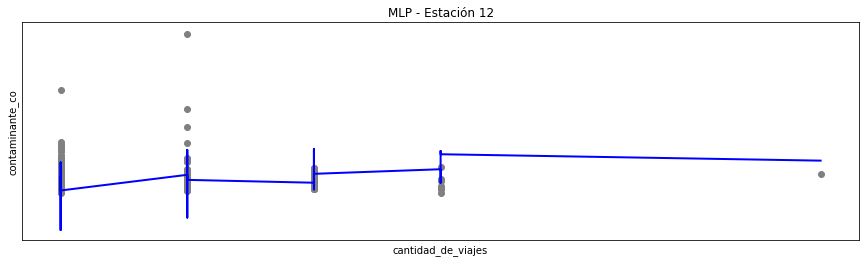

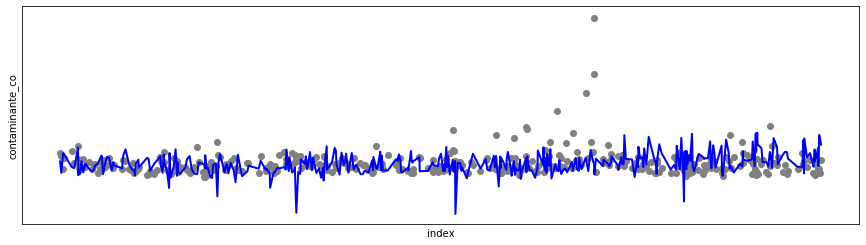

In [38]:
#Plot
figure(figsize=(15, 4))
plt.scatter(test_12['cantidad_de_viajes'], test_12["contaminante_co"],  color='grey')
plt.plot(test_12['cantidad_de_viajes'], y_pred_mlp_12 , color='blue', linewidth=2)

plt.title("MLP - Estación 12")

plt.xticks(())
plt.yticks(())
plt.xlabel('cantidad_de_viajes')
plt.ylabel("contaminante_co")
plt.show()

#Plot - sort
figure(figsize=(15, 4))
plt.scatter(test_sort_12.index, test_sort_12["contaminante_co"],  color='grey')
plt.plot(test_sort_12.index, y_pred_mlp_sort_12 , color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())
plt.xlabel('index')
plt.ylabel("contaminante_co")
plt.show()